This notebook is used to test the conversion of non-deterministic <span style="font-variant:small-caps;">Fsm</span>s into deterministic <span style="font-variant:small-caps;">Fsm</span>s.

In [1]:
%run 01-NFA-2-DFA.ipynb

Version 1.0.5


Unfortunately, the `%run` magic does not work with the `mypy`extension for notebooks.  
Hence we have to switch it off.

In [2]:
%nb_mypy Off

In order to represent the <span style="font-variant:small-caps;">Fsm</span>s graphically, we use the notebook `FSM-2-Dot.ipynb`.  This notebook uses the package `graphviz`, wich can be installed by the following commands.

!conda install -y -c  anaconda graphviz
!conda install -y -c  anaconda python-graphviz

In [3]:
%run FSM-2-Dot.ipynb

In [4]:
States = { 'q' + str(i) for i in range(8) }
States

{'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7'}

In [5]:
Σ = { 'a', 'b' }

In [6]:
δ = {
    ('q0',  '𝜀'): { 'q1', 'q2'},
    ('q1', 'b'): { 'q3' },
    ('q2', 'a'): { 'q4' },
    ('q3', 'a'): { 'q5' },
    ('q4', 'b'): { 'q6' },
    ('q5',  '𝜀'): { 'q7' },
    ('q6',  '𝜀'): { 'q7' },
    ('q7',  '𝜀'): { 'q0' }
}

States = {'4', '1', '2', '3'}
δ = {
    ('4', 'a'): {'4'},
    ('4', 'b'): {'4','1'},
    ('1', 'a'): {'2'},
    ('1', 'b'): {'2'},
    ('2', 'a'): {'3'},
    ('2', 'b'): {'3'}
}

The non-deterministic <span style="font-variant:small-caps;">Fsm</span> defined below is taken from the lecture notes.

In [7]:
nfa44 = States, Σ, δ, 'q0', { 'q7' }

The function `nfa2dot`can be used to render this <span style="font-variant:small-caps;">Fsm</span>.

In [8]:
d = nfa2dot(nfa44)

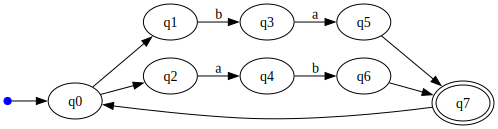

In [9]:
d

This recognizes the same language as the language described by
$$ (a \cdot b + b \cdot a) \cdot (a \cdot b + b \cdot a)^* $$
Let us convert it into a deterministic <span style="font-variant:small-caps;">Fsm</span>: 

In [10]:
dfa44 = nfa2dfa(nfa44)

The function `dfa2dot`can be used to render this <span style="font-variant:small-caps;">Fsm</span>.

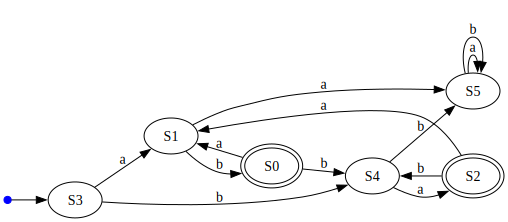

In [11]:
dot, states2Names = dfa2dot(dfa44)
dot

In order to inspect the states of this deterministic <span style="font-variant:small-caps;">Fsm</span> we print the dictionary  `states2Names`.

In [12]:
states2Names

{frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}): 'S0',
 frozenset({'q4'}): 'S1',
 frozenset({'q0', 'q1', 'q2', 'q5', 'q7'}): 'S2',
 frozenset({'q0', 'q1', 'q2'}): 'S3',
 frozenset({'q3'}): 'S4',
 frozenset(): 'S5'}

We can also print the <span style="font-variant:small-caps;">Fsm</span>.

In [13]:
dfa44

({frozenset(),
  frozenset({'q0', 'q1', 'q2'}),
  frozenset({'q3'}),
  frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}),
  frozenset({'q4'}),
  frozenset({'q0', 'q1', 'q2', 'q5', 'q7'})},
 {'a', 'b'},
 {(frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}), 'a'): frozenset({'q4'}),
  (frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}), 'b'): frozenset({'q3'}),
  (frozenset({'q4'}), 'a'): frozenset(),
  (frozenset({'q4'}), 'b'): frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}),
  (frozenset({'q0', 'q1', 'q2', 'q5', 'q7'}), 'a'): frozenset({'q4'}),
  (frozenset({'q0', 'q1', 'q2', 'q5', 'q7'}), 'b'): frozenset({'q3'}),
  (frozenset({'q0', 'q1', 'q2'}), 'a'): frozenset({'q4'}),
  (frozenset({'q0', 'q1', 'q2'}), 'b'): frozenset({'q3'}),
  (frozenset({'q3'}), 'a'): frozenset({'q0', 'q1', 'q2', 'q5', 'q7'}),
  (frozenset({'q3'}), 'b'): frozenset(),
  (frozenset(), 'a'): frozenset(),
  (frozenset(), 'b'): frozenset()},
 frozenset({'q0', 'q1', 'q2'}),
 {frozenset({'q0', 'q1', 'q2', 'q6', 'q7'}),
  frozenset({'q0', 'q1', 'q2', '